In [1]:
from PlacePulseDataset import PlacePulseDataset

In [2]:
# Loads the dataset by downloading, extracting, preprocessing, and deleting the archive.
# Depending on your connection speed, might take some time to finish.

PlacePulseDataset.load()

100%|██████████| 2.64G/2.64G [23:27<00:00, 1.88MiB/s]  
Extracting files: 100%|██████████| 110994/110994 [00:39<00:00, 2807.72file/s]


Deleting archive.


Preprocessing images: 100%|██████████| 110988/110988 [00:36<00:00, 3079.79file/s]


Removing original images folder


In [3]:
dataset = PlacePulseDataset()

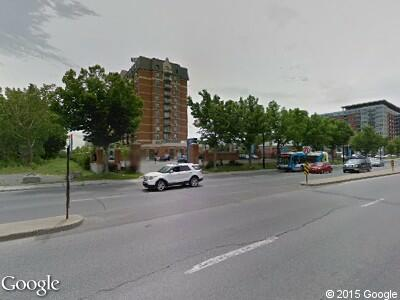

In [4]:
from PIL import Image
(image_array, score) = dataset[0]
image = Image.fromarray(image_array)
image

In [5]:
type(score)

numpy.float32

In [6]:
print(f"TrueSkill score: {score}")

TrueSkill score: 36.50270080566406


# Training a model

In [7]:
from PlacePulseDataset import transform_transformer
from torch.utils.data import Subset

train_dataset = PlacePulseDataset(transform=transform_transformer, split='train')
val_dataset = PlacePulseDataset(transform=transform_transformer, split='val')

indices = list(range(10))
train_dataset = Subset(train_dataset, indices)
val_dataset = Subset(val_dataset, indices)


In [8]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import DataLoader
from tqdm import tqdm

In [9]:
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

model = models.vgg16()

# Modify the classifier for linear regression
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 1)  # Single output node for regression

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')

    # Training
    train_loss = 0.0
    for images, ratings in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        outputs = outputs.squeeze()
        loss = criterion(outputs, ratings)
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item() 
    train_loss /= len(train_loader)
    print(f'Train Loss: {train_loss:.4f}')
    
    # Validation
    val_loss = 0.0
    for images, ratings in tqdm(val_loader):
        outputs = model(images)
        outputs = outputs.squeeze()
        loss = criterion(outputs, ratings)
        
        val_loss += loss.item()
    val_loss /= len(val_loader)
    print(f'Validation Loss: {val_loss:.4f}')

Epoch [1/10]


100%|██████████| 3/3 [00:05<00:00,  1.90s/it]


Train Loss: 627.3908


100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


Validation Loss: 684.8772
Epoch [2/10]


100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Train Loss: 617.0828


100%|██████████| 3/3 [00:01<00:00,  2.50it/s]


Validation Loss: 674.7747
Epoch [3/10]


100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


Train Loss: 604.8364


100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


Validation Loss: 663.0905
Epoch [4/10]


100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Train Loss: 595.0757


100%|██████████| 3/3 [00:01<00:00,  2.64it/s]


Validation Loss: 652.0799
Epoch [5/10]


100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Train Loss: 584.6051


100%|██████████| 3/3 [00:01<00:00,  2.58it/s]


Validation Loss: 641.9328
Epoch [6/10]


100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Train Loss: 572.5461


100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


Validation Loss: 632.1825
Epoch [7/10]


100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Train Loss: 563.6924


100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


Validation Loss: 622.1746
Epoch [8/10]


100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Train Loss: 552.9239


100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


Validation Loss: 609.8306
Epoch [9/10]


100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Train Loss: 543.7405


100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


Validation Loss: 599.8044
Epoch [10/10]


100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Train Loss: 536.8218


100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

Validation Loss: 590.5455
